# Libraries are Our Friends

When used in the context of computer programming, a **library** is a collection of code packaged together so that it can easily be shared and used by other programmers.
So far, we've just been using code from Python's **standard library**, which is code that comes standard with Python itself.

There are over 150,000 libraries published to [the Python Package Index](https://pypi.org/) for a multitude of different uses, from scientific computing to video game development to posting to Twitter and everything in between.

We'll just focus on a few of these libraries today.
If you launched this notebook from [Binder](https://mybinder.org/), these libraries should be already installed and available for you to use.
If you're running your own [Jupyter](http://jupyter.org/) instance, then you'll have to install them using something like [Conda](https://conda.io/) or [pip](https://pip.pypa.io/en/stable/).

## PIL

[PIL](https://pillow.readthedocs.io) (Python Imaging Library) contains a ton of code for reading, writing, and manipulating images.
For convenience, I've provided some images to work with in the `resources` directory.

In [1]:
from PIL import Image

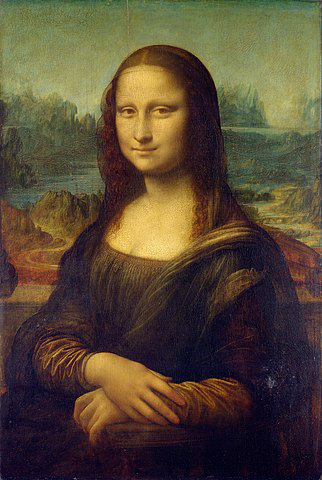

In [2]:
mona = Image.open("../resources/MonaLisa.jpg")
mona

Let's flip the image upside down by rotating it 180 degrees.

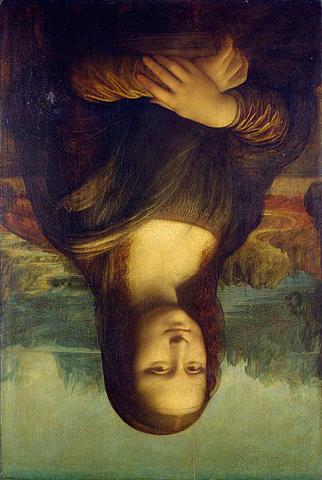

In [3]:
mona.rotate(180)

We can get the size of the image:

In [4]:
width, height = mona.size
(width, height)

(322, 480)

The image is returned as a **tuple** of two integers.
A tuple is very similar to a list, but is often used when the number and type of elements is expected to always be fixed (e.g. here it will always be of length 2: width and height).
We can **destructure** the tuple into two named variables by assigning it as above, and recombine as below:

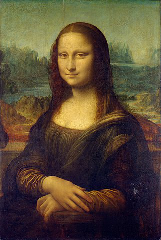

In [5]:
# use integer division (//) because we can't work in fractions of pixels
new_size = (width // 2, height // 2)
mona.resize(new_size)

PIL also comes with many filters that we can apply to our image:

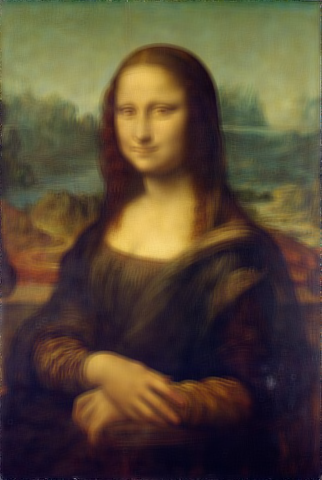

In [6]:
from PIL import ImageFilter
mona.filter(ImageFilter.BLUR)

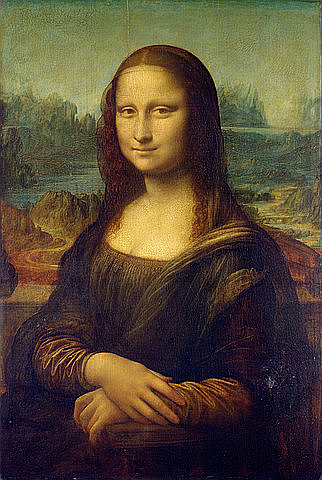

In [7]:
mona.filter(ImageFilter.SHARPEN)

We can use PIL to convert the image to grayscale.
Normally, we deal with images in `RGB` (red, green, blue) mode, where the computer represents each pixel as a combination of red, green, and blue light.
For grayscale, we'll convert to `L` (luminance) mode, which represents each pixel as the intensity of light.

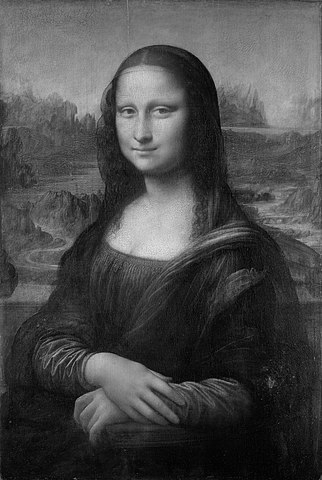

In [8]:
from PIL import ImageOps
gray_mona = ImageOps.grayscale(mona)
gray_mona

We can re-colorize the image by specifying new colors to replace black and white:

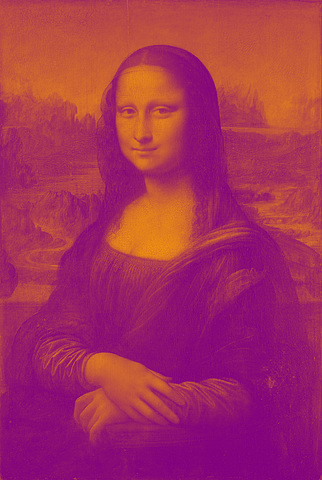

In [9]:
ImageOps.colorize(gray_mona, "purple", "orange")

Lets open up another image and combine the two:

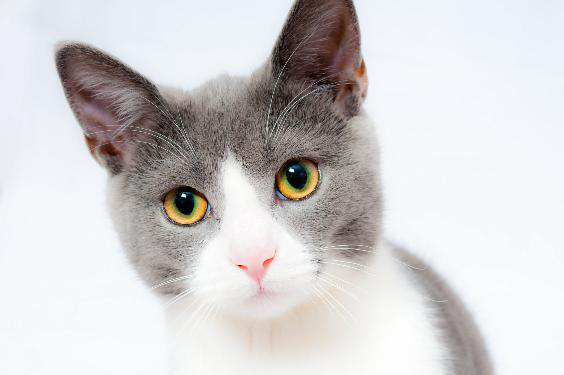

In [10]:
cat = Image.open("../resources/cat.jpg")
cat

First, we'll resize the Mona Lisa image to be smaller then we'll paste it on top of the cat image:

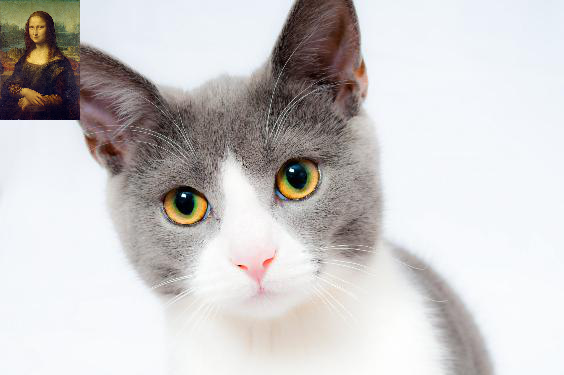

In [11]:
small_mona = mona.resize((80, 120))

# make a copy of cat
cat_and_mona = cat.copy()
cat_and_mona.paste(small_mona)
cat_and_mona

We could also blend the two together:

In [12]:
from PIL import ImageChops

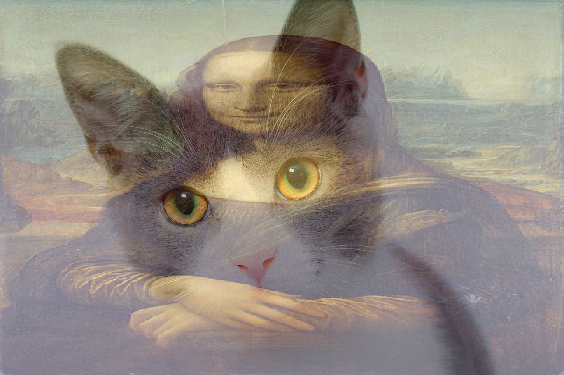

In [13]:
ImageChops.blend(cat, mona.resize(cat.size), 0.5)

Try playing with different values between 0.0 and 1.0 for the alpha parameter to `blend`.

Take some time to play around with these functions and others you might find in the [PIL documentation](https://pillow.readthedocs.io/en/5.3.x/reference/index.html).

## Pandas

[Pandas](https://pandas.pydata.org/) is an extremely powerful library of data analysis tools that we'll just barely scratch the surface of.
Pandas is great for reading in structured data, e.g. CSV (comma-separated value) data that can be exported from a Microsoft Excel spreadsheet.
We'll be exploring the [City of Philadelphia's publicly available Employee Salaries and Overtime dataset](https://www.opendataphilly.org/dataset/employee-salaries-overtime/resource/18e41a7e-8a90-4c65-b1ee-3e7508cfda24).

In [14]:
# let's take a peek at the CSV file using Python's built-in file `open` function
csv_file = open('../resources/employee_salaries.csv')

# underscore is conventionally used where a variable name is required but we don't care about the value 
# here we just want to repeat some code 5 times
for _ in range(5):
    print(csv_file.readline())

objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross

280357,2018,1,ADAMS,PAULETTE,DIRECTOR OF COMMUNITY DEVELOPMENT,CITY COUNCIL,60000,0

280358,2018,1,ADAMS-BROADDUS,COLIA,ADMINISTRATIVE ASSISTANT,CITY COUNCIL,60000,0

280359,2018,1,ALLFORD,KENYON,CLEANER,CITY COUNCIL,29093,0

280360,2018,1,ALVAREZ FEBO,RAFAEL,COMMUNITY RELATIONS LIAISON,CITY COUNCIL,55000,0



In [15]:
# save ourselves some typing by **aliasing** pandas to a shorter name (e.g. `pd`)
import pandas as pd

In [16]:
# load a CSV file
data = pd.read_csv("../resources/employee_salaries.csv")

# let's work without any names to respect privacy
data = data.drop(columns=["first_name", "last_name"])

# let's look at the first 5 rows of data
data.head(5)

,objectid,calendar_year,quarter,title,department,annual_salary,ytd_overtime_gross
0,280357,2018,1,DIRECTOR OF COMMUNITY DEVELOPMENT,CITY COUNCIL,60000.0,0.0
1,280358,2018,1,ADMINISTRATIVE ASSISTANT,CITY COUNCIL,60000.0,0.0
2,280359,2018,1,CLEANER,CITY COUNCIL,29093.0,0.0
3,280360,2018,1,COMMUNITY RELATIONS LIAISON,CITY COUNCIL,55000.0,0.0
4,280361,2018,1,DIRECTOR OF VETERANS ADVISORY COMMISSION,CITY COUNCIL,65000.0,0.0


We can use Pandas to answer questions about the data, e.g. "What position is the highest paid city employee of all time?"

In [17]:
# get the index (row number) for the row with the maximum value for annual_salary
max_salary_index = data['annual_salary'].idxmax()

# get a specific row number's data
highest_paid = data.iloc[max_salary_index]

# get the row data as a dictionary
highest_paid.to_dict()

{'objectid': 294495,
 'calendar_year': 2018,
 'quarter': 1,
 'title': 'MEDICAL EXAMINER',
 'department': 'DEPARTMENT OF PUBLIC HEALTH',
 'annual_salary': 268533.0,
 'ytd_overtime_gross': 0.0}

Who made the most overtime pay in a single year?

In [18]:
data.iloc[data['ytd_overtime_gross'].idxmax()].to_dict()

{'objectid': 105927,
 'calendar_year': 2016,
 'quarter': 4,
 'title': 'FIRE SERV PARAMEDIC',
 'department': 'FIRE DEPARTMENT',
 'annual_salary': 79897.0,
 'ytd_overtime_gross': 117844.04}

Let's filter down to just 2018 data:

In [19]:
data = data[data['calendar_year'] == 2018]

How many employees does each department have?

In [20]:
# group by department
by_dept = data.groupby('department')

# get size of each group (department) and sort in descending order
by_dept.size().sort_values(ascending=False)

department
POLICE DEPARTMENT                         16412
FIRE DEPARTMENT                            5168
COMMON PLEAS COURT                         5116
PHILA. PRISONS                             4454
WATER DEPARTMENT                           4370
STREETS DEPARTMENT                         3404
RECREATION DEPARTMENT                      3142
DEPARTMENT OF HUMAN SERVICES               2982
FREE LIBRARY OF PHILA.                     1932
DEPARTMENT OF PUBLIC HEALTH                1880
AIRPORT / COMMERCE                         1676
REVENUE DEPARTMENT                         1208
DISTRICT ATTORNEY'S OFFICE                 1022
MANAGING DIRECTOR'S OFFICE                 1008
OFFICE OF INNOVATION & TECHNOLOGY           826
DEPARTMENT OF LICENSES & INSPECTIONS        786
CITY SHERIFF'S DEPARTMENT                   734
FLEET MANAGEMENT                            724
LAW DEPARTMENT                              642
PERSONNEL DEPARTMENT                        474
OFFICE OF BEHAVIORAL HEALTH  

How much did each department spend on salaries and overtime?

In [21]:
# let's add a new column that sums salary and overtime
data['total_pay'] = data['annual_salary'] + data['ytd_overtime_gross']
data.head(5)

,objectid,calendar_year,quarter,title,department,annual_salary,ytd_overtime_gross,total_pay
0,280357,2018,1,DIRECTOR OF COMMUNITY DEVELOPMENT,CITY COUNCIL,60000.0,0.0,60000.0
1,280358,2018,1,ADMINISTRATIVE ASSISTANT,CITY COUNCIL,60000.0,0.0,60000.0
2,280359,2018,1,CLEANER,CITY COUNCIL,29093.0,0.0,29093.0
3,280360,2018,1,COMMUNITY RELATIONS LIAISON,CITY COUNCIL,55000.0,0.0,55000.0
4,280361,2018,1,DIRECTOR OF VETERANS ADVISORY COMMISSION,CITY COUNCIL,65000.0,0.0,65000.0


In [22]:
# group by department
by_dept = data.groupby('department')

# sort departments by total pay
by_total_pay = by_dept.sum()['total_pay'].sort_values(ascending=False)

# format the numeric values as currency
by_total_pay.map('${:,.2f}'.format)

department
POLICE DEPARTMENT                         $1,111,589,172.10
FIRE DEPARTMENT                             $388,620,097.28
PHILA. PRISONS                              $238,175,935.48
COMMON PLEAS COURT                          $232,690,379.72
WATER DEPARTMENT                            $225,589,772.12
DEPARTMENT OF HUMAN SERVICES                $169,977,440.52
STREETS DEPARTMENT                          $153,425,198.68
DEPARTMENT OF PUBLIC HEALTH                 $102,827,336.12
AIRPORT / COMMERCE                           $83,728,707.06
FREE LIBRARY OF PHILA.                       $73,216,627.26
RECREATION DEPARTMENT                        $72,269,981.22
DISTRICT ATTORNEY'S OFFICE                   $63,326,268.94
MANAGING DIRECTOR'S OFFICE                   $61,621,034.78
OFFICE OF INNOVATION & TECHNOLOGY            $58,405,425.14
REVENUE DEPARTMENT                           $53,786,218.40
CITY SHERIFF'S DEPARTMENT                    $43,448,428.82
LAW DEPARTMENT               

Let's use the space below to try to answer questions together as a class.
Feel free to refer to the [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/).

That's all for now but keep practicing and next time we'll be working with libraries that allow us to interact with APIs (Application Programming Interfaces; interfaces for computers talking to computers as opposed to being used by humans) on the Internet to do fun things.